In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Capstone.zip to Capstone.zip


In [4]:
import zipfile
import os

zip_file = "/content/Capstone.zip"
extract_dir = "/content/extracted"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

Files extracted to: /content/extracted


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_excel('/content/extracted/Capstone/Cleaned Data.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [8]:
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)

In [9]:
df.MentallyIll

,MentallyIll
0,0
1,1
2,0
3,0
4,1
...,...
329,0
330,0
331,0
332,1


In [10]:
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)

df = df.iloc[1:]
df.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"₹50,000-₹74,999",Delhi,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"₹150,000-₹174,999",Bengaluru,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"₹25,000-₹49,999",Chennai,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"₹25,000-₹49,999",Bhopal,iOS Phone / Tablet
5,1,0,High School or GED,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"₹0-₹9,999",Hyderabad,Android Phone / Tablet


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 1 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    333 non-null    int64  
 1   MentallyIll                                                   333 non-null    int64  
 2   Education                                                     333 non-null    object 
 3   I have my own computer separate from a smart phone            333 non-null    int64  
 4   I have been hospitalized before for my mental illness         333 non-null    int64  
 5   How many days were you hospitalized for your mental illness   333 non-null    float64
 6   I am legally disabled                                         333 non-null    int64  
 7   I have my regular access to the internet                      333 non-n

In [12]:
df.rename(columns={'Annual income (including any social welfare programs) in USD':'Income'}, inplace =True)

In [13]:
income = pd.to_numeric(df.Income)

In [14]:
income.describe()

,Income
count,333.000000
mean,37.432432
std,30.697402
min,0.000000
25%,12.000000
50%,30.000000
75%,55.000000
max,100.000000


<Axes: xlabel='count', ylabel='Education'>

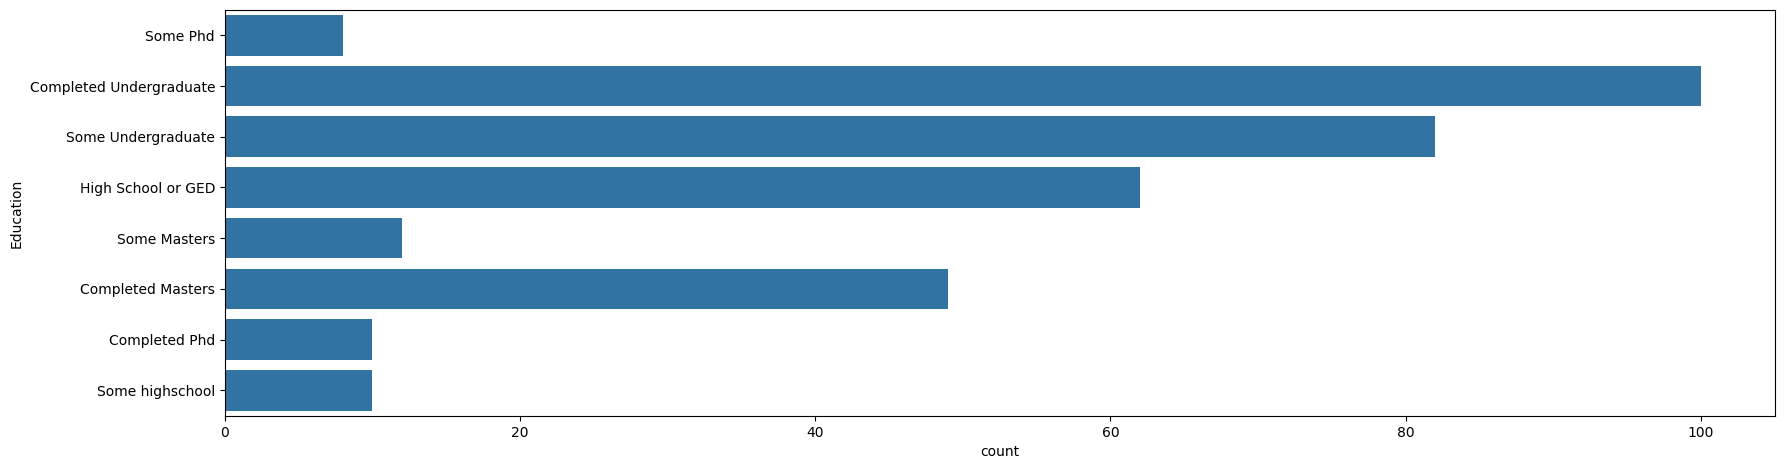

In [15]:
a4_dims = (20, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.Education)

In [16]:
edu = df.Education.to_frame().to_records()

In [17]:
df.columns

Index(['I am currently employed at least part-time', 'MentallyIll',
       'Education', 'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.', 'Income',
       'Unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender', 'Household Income', 'Region', 'Device Type'],
      dtype='object')

In [18]:
mental = df.MentallyIll.to_frame().to_records()
income = df.Income.to_frame().to_records()
unemployed = df.Unemployed.to_frame().to_records()
gender = df.Gender.to_frame().to_records()
age = df.Age.to_frame().to_records()

In [19]:
sixty, fifty, thirty, twenty = [], [], [], []
for i in age:
    if i[1] == '> 60':
        sixty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '45-60':
        fifty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '30-44':
        thirty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '18-29':
        twenty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))

In [20]:
age_list = [sixty, fifty, thirty, twenty]
title_age_list = ['Sixties', 'Fifties', 'Thirties', 'Twenties']
j = 0;
for i in age_list:

    x_val = sorted([x[1] for x in i])
    unemp = [x[2] for x in i]


    x_int = []
    for i in x_val:
        x_int.append(int(i))


    print(title_age_list[j], '-- Percent Unemployed:', sum(unemp)/len(unemp))
    j = j+1

Sixties -- Percent Unemployed: 0.325
Fifties -- Percent Unemployed: 0.18181818181818182
Thirties -- Percent Unemployed: 0.24509803921568626
Twenties -- Percent Unemployed: 0.3076923076923077


In [21]:
completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters = [], [], [], [],[], [], [], []
for i in edu:
    if i[1] == 'Completed Masters':
        completed_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Undergraduate':
        completed_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'High School or GED':
        high_school.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Phd':
        some_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Phd':
        completed_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some highschool':
        some_highschool.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Undergraduate':
        some_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    else:
        some_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))

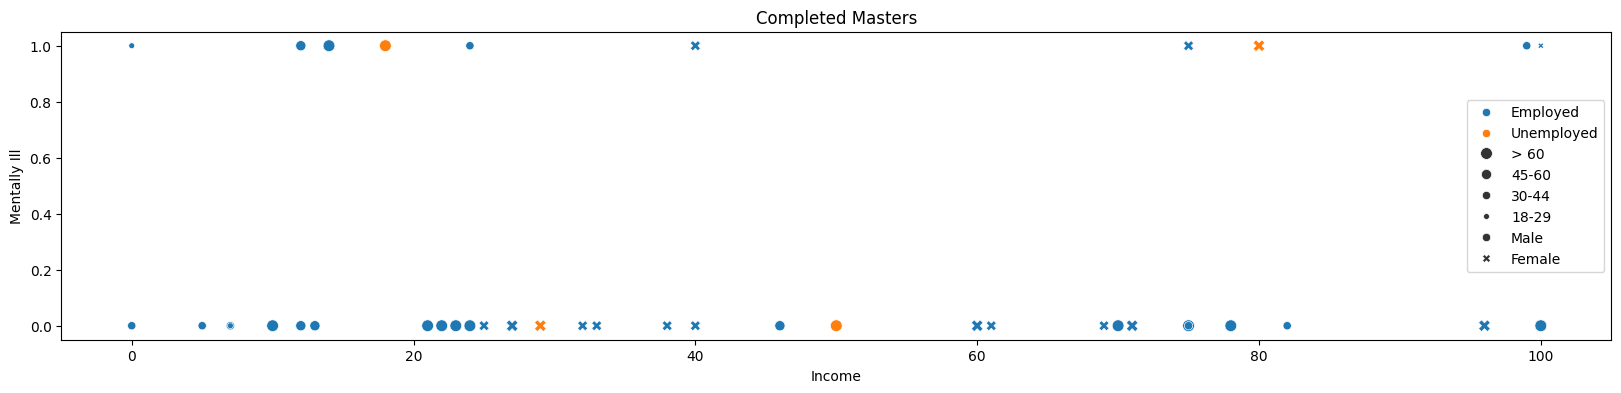

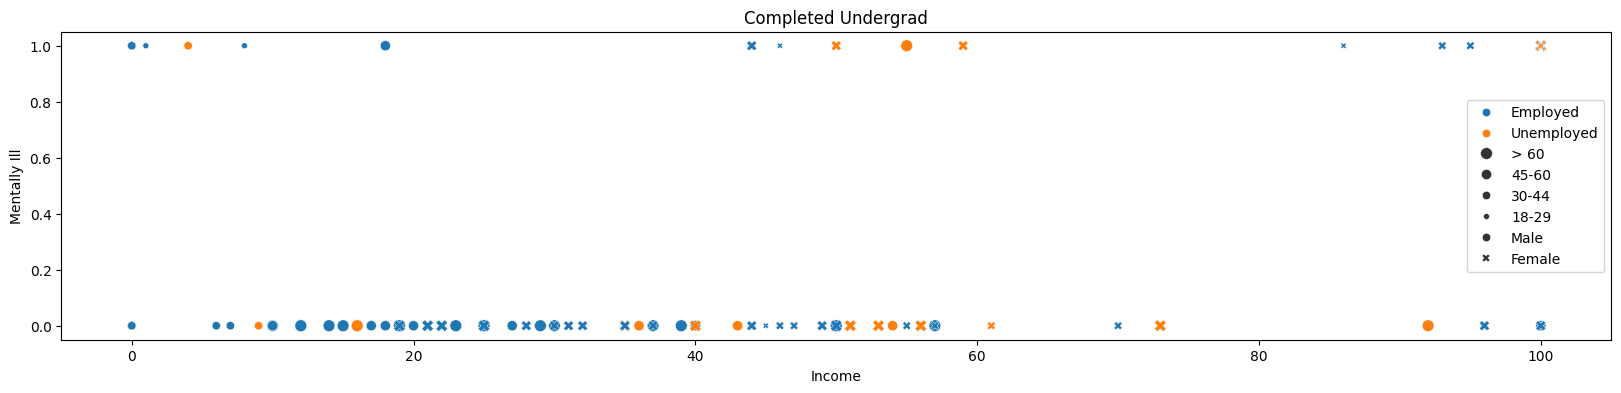

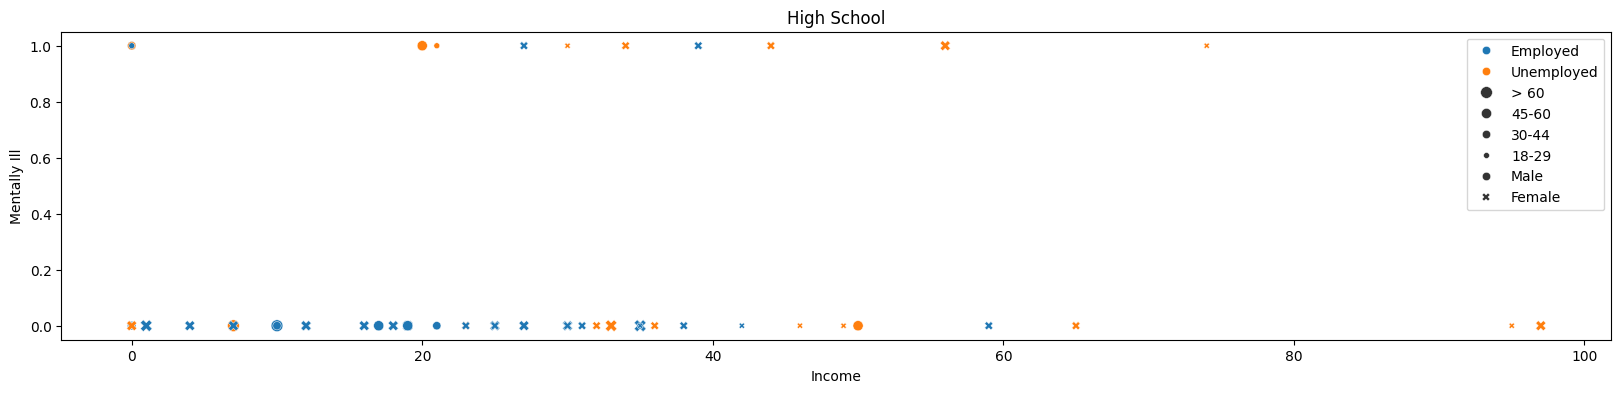

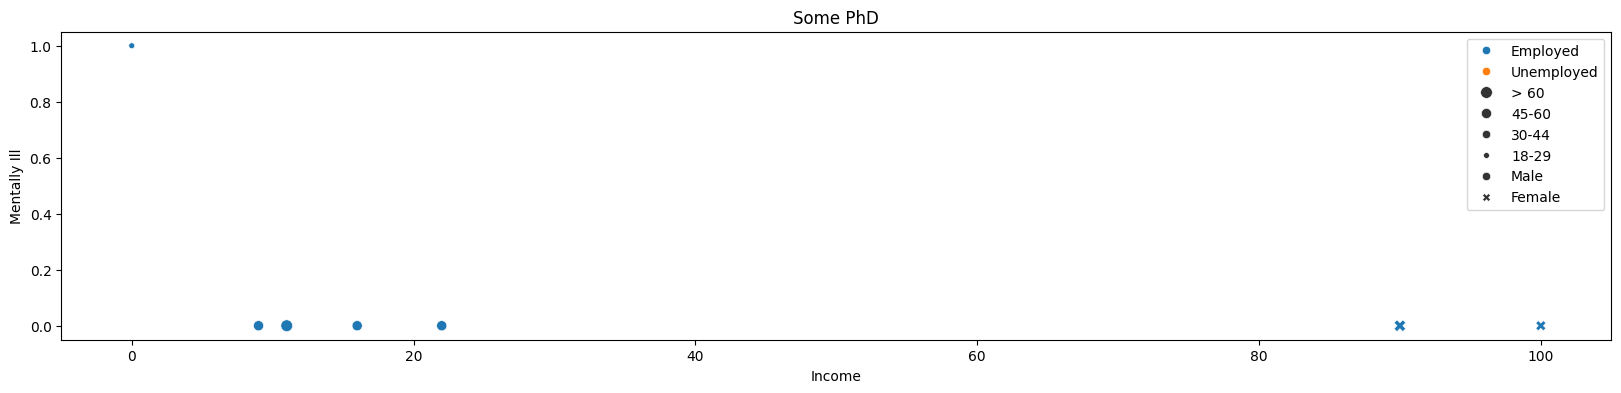

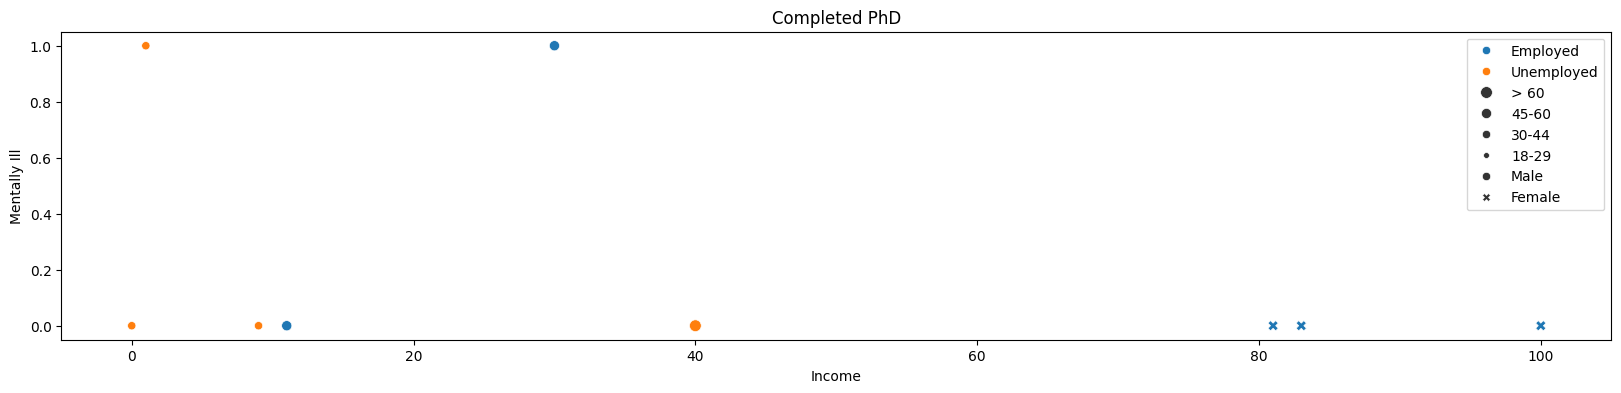

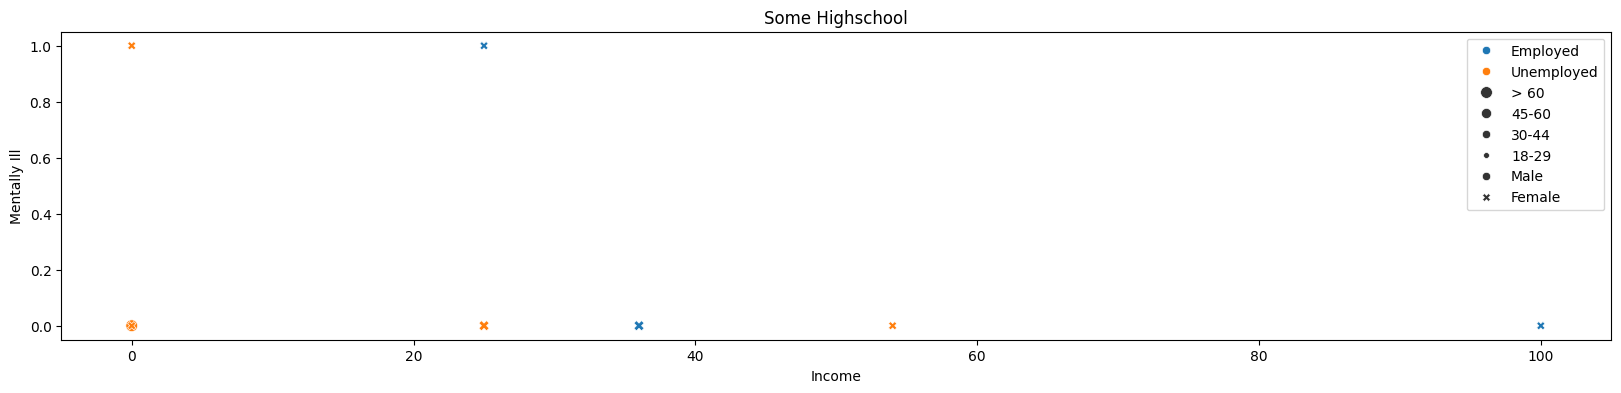

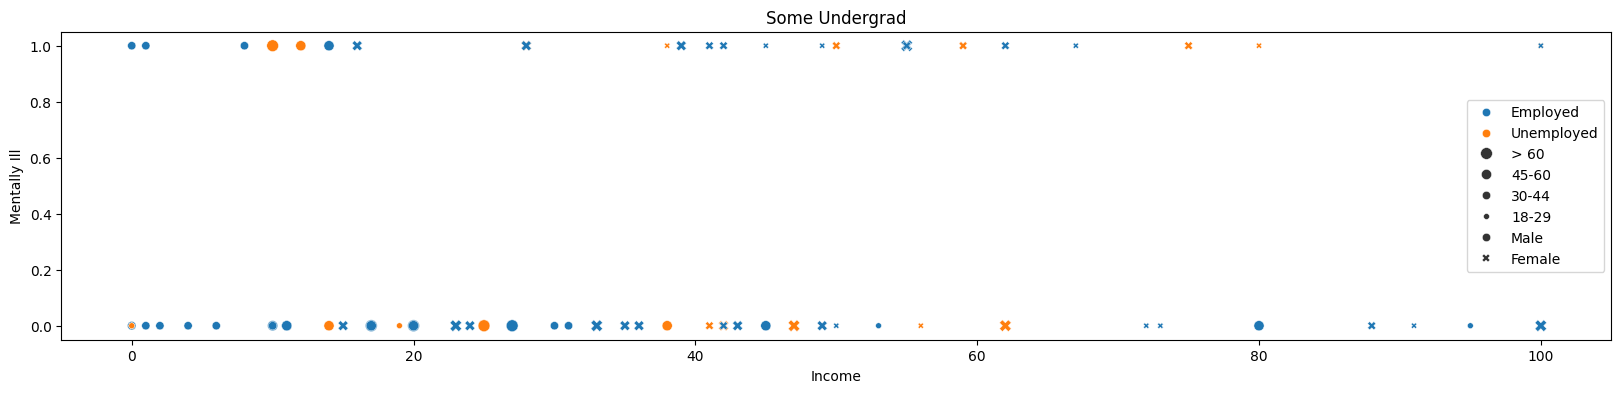

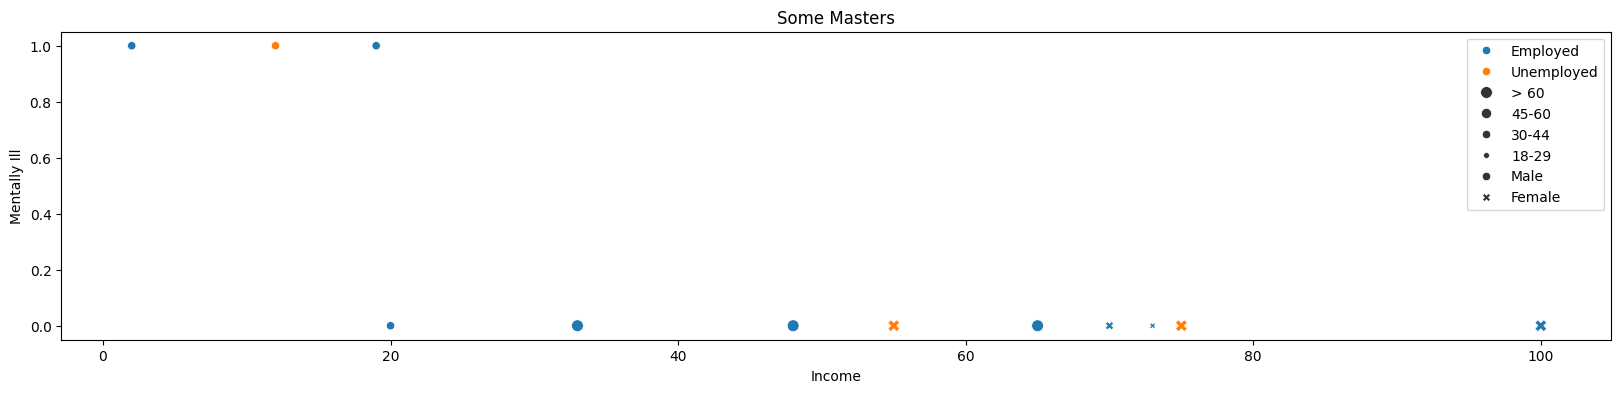

In [22]:
tot_list = [completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters]
title_list = ['Completed Masters', 'Completed Undergrad', 'High School', 'Some PhD', 'Completed PhD', 'Some Highschool', 'Some Undergrad', 'Some Masters']
j = 0;
for i in tot_list:

    x_val = sorted([x[2] for x in i])
    y_val = [x[1] for x in i]
    unemp = [x[3] for x in i]
    gend = [x[4] for x in i]
    age = [x[5] for x in i]


    x_int = []
    for i in x_val:
        x_int.append(int(i))

    for i in range(len(unemp)):
        if unemp[i] == 1:
            unemp[i] = 'Unemployed'
        elif unemp[i] == 0:
            unemp[i] = 'Employed'

    a4_dims = (20, 4)
    fig, ax = plt.subplots(figsize=a4_dims)
    g = sns.scatterplot(x = x_int, y=y_val,
                        hue=unemp, hue_order = ('Employed', 'Unemployed'),
                        style=gend,
                        size=age, size_order = ('> 60', '45-60', '30-44','18-29'))
    ax.set(xlabel='Income', ylabel='Mentally Ill')
    plt.title(title_list[j])
    j = j+1

In [23]:
df2 = df

df2 = df2.iloc[:, :-3]

df2 = df2.replace(['Lack of concentration','Anxiety', 'Depression',
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior',
                   'Mood swings', 'Tiredness'], 1)

df2 = df2.replace(to_replace=['Female', 'Male'], value=[0, 1])

df2 = df2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])

df2 = df2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters',
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])

In [24]:
df2.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender
1,1,1,6,1,0,0.0,0,1,0,0,...,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23,1
2,1,0,3,1,0,0.0,0,1,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1
3,0,0,2,1,0,0.0,0,1,1,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1
4,1,1,3,1,1,35.0,1,1,0,1,...,1.0,1,1,1.0,1.0,1.0,1.0,1.0,37,1
5,1,0,1,1,0,0.0,0,1,1,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1


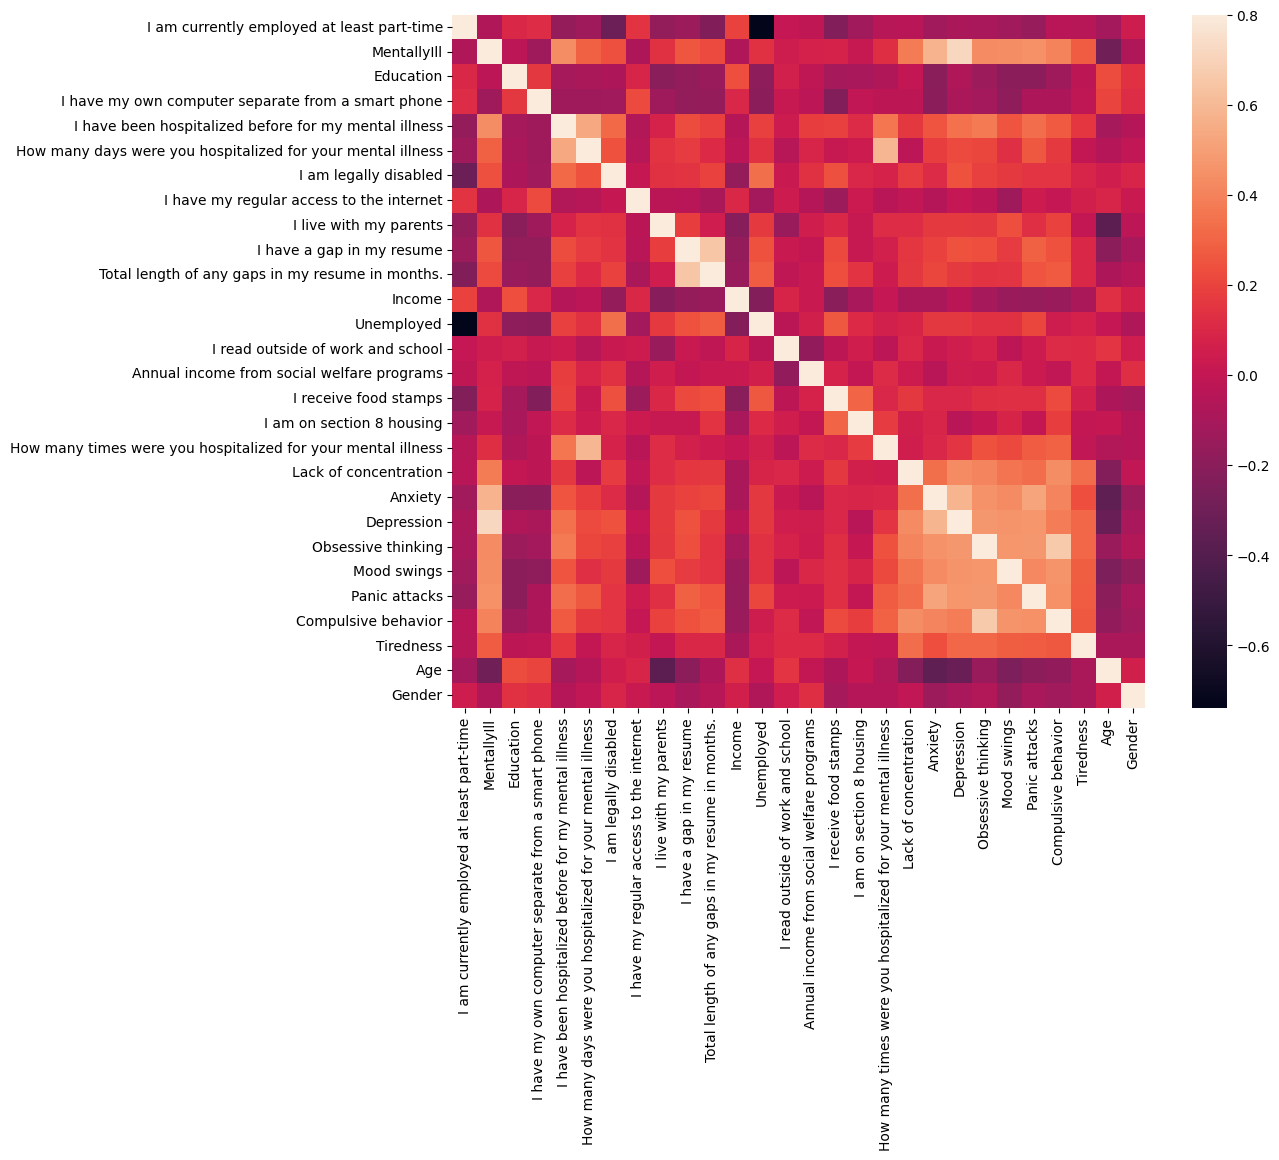

In [25]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

###Unemployed correlation matrix

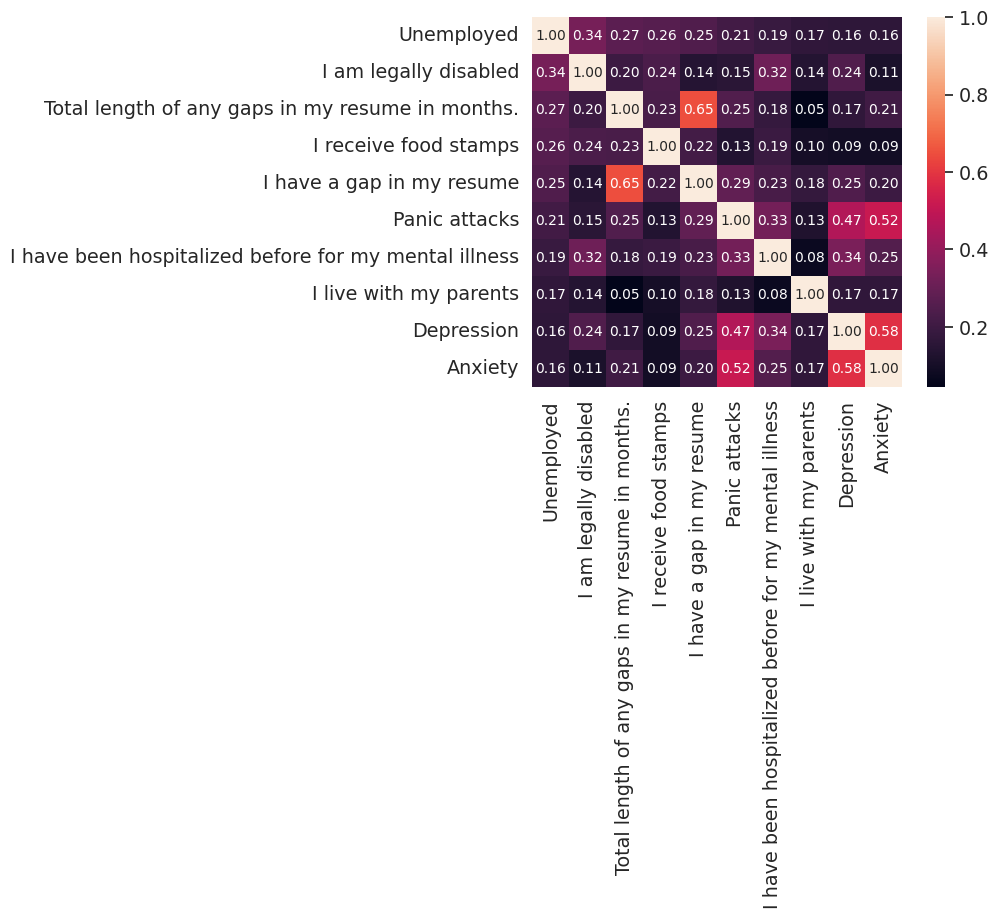

In [27]:
k = 10
cols = corrmat.nlargest(k, 'Unemployed')['Unemployed'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

###MentallyIll correlation matrix

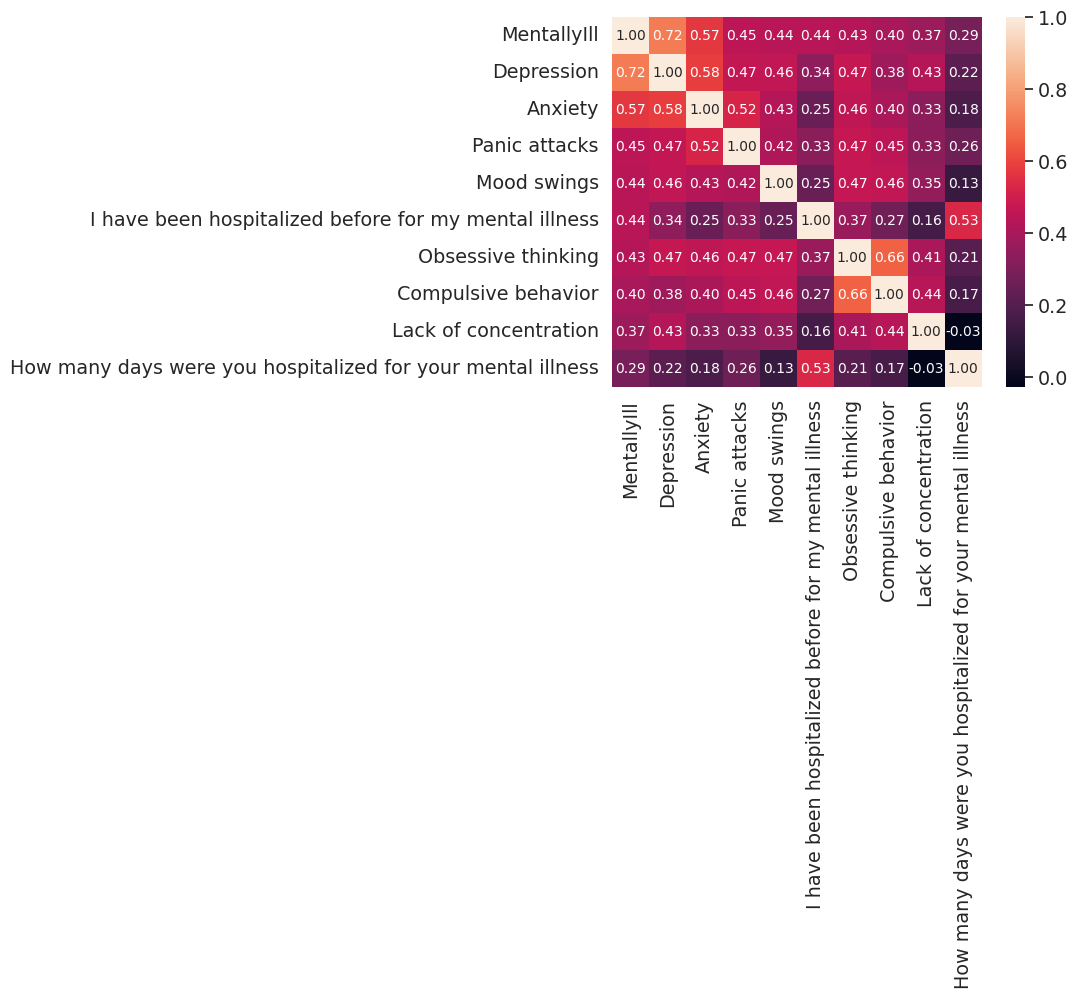

In [26]:
k = 10
cols = corrmat.nlargest(k, 'MentallyIll')['MentallyIll'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#ML Models Implementation

##Random Forest

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df3 = df2.copy()
df4 = df2.copy()
df5 = df2.copy()
target=df2['MentallyIll']
df2.drop(['MentallyIll'],axis=1,inplace=True)

In [29]:
X = df2
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest = RandomForestClassifier(max_depth=10, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [30]:
print(forest.score(X_test,y_test))

0.9104477611940298


<Axes: xlabel='feature'>

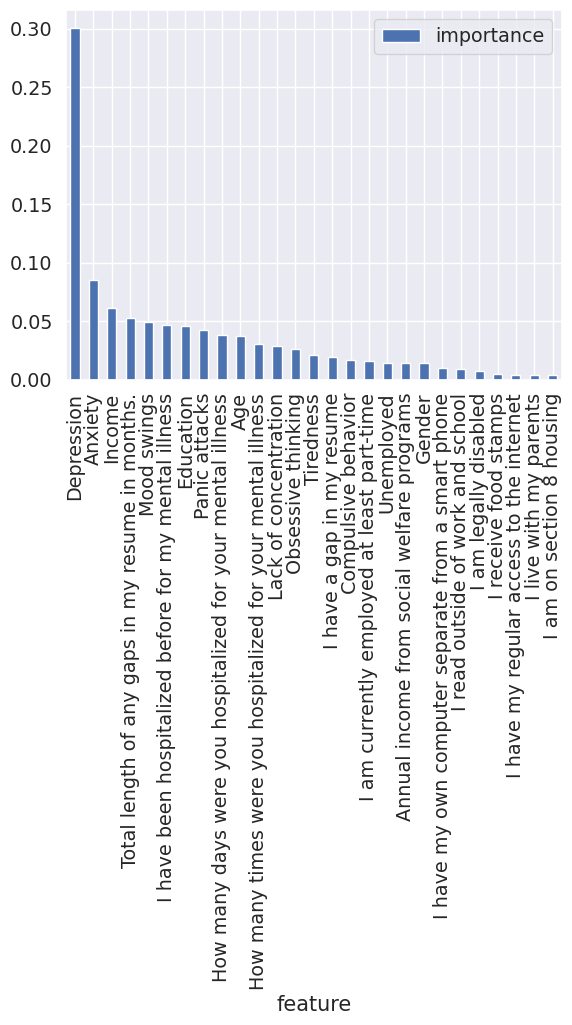

In [31]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[185,  15],
       [ 19,  47]])

In [33]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

from sklearn.metrics import f1_score
f1_score(y_train, predictions)

Precision: 0.7580645161290323
Recall: 0.7121212121212122


0.734375

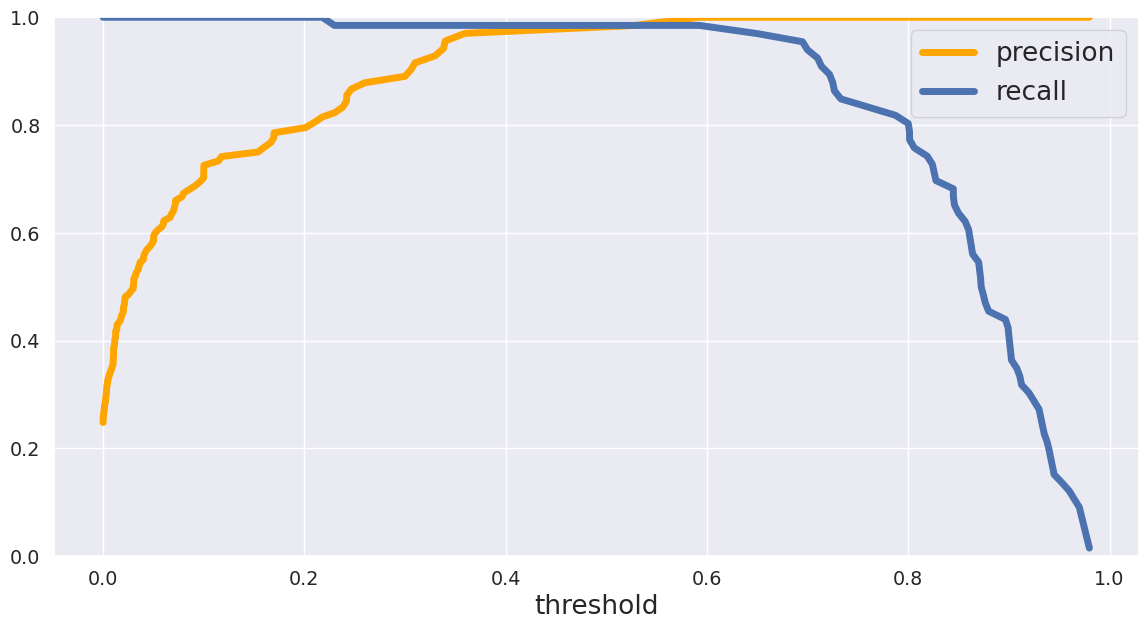

In [34]:
from sklearn.metrics import precision_recall_curve

y_scores = forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "orange", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

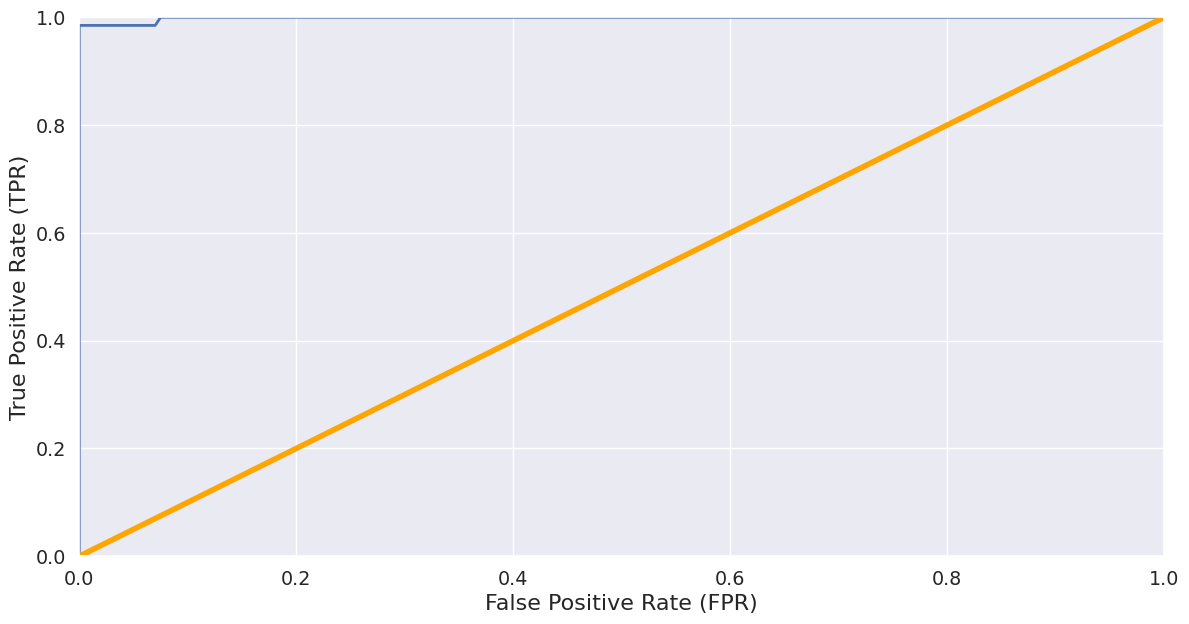

In [35]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'orange', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.998901515151515


In [37]:
target=df3['MentallyIll']
df3.drop(['MentallyIll'],axis=1,inplace=True)

In [38]:
X = df3
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest3 = RandomForestClassifier(max_depth=5, random_state=0)
forest3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [39]:
print(forest3.score(X_test,y_test))

0.9104477611940298


<Axes: xlabel='feature'>

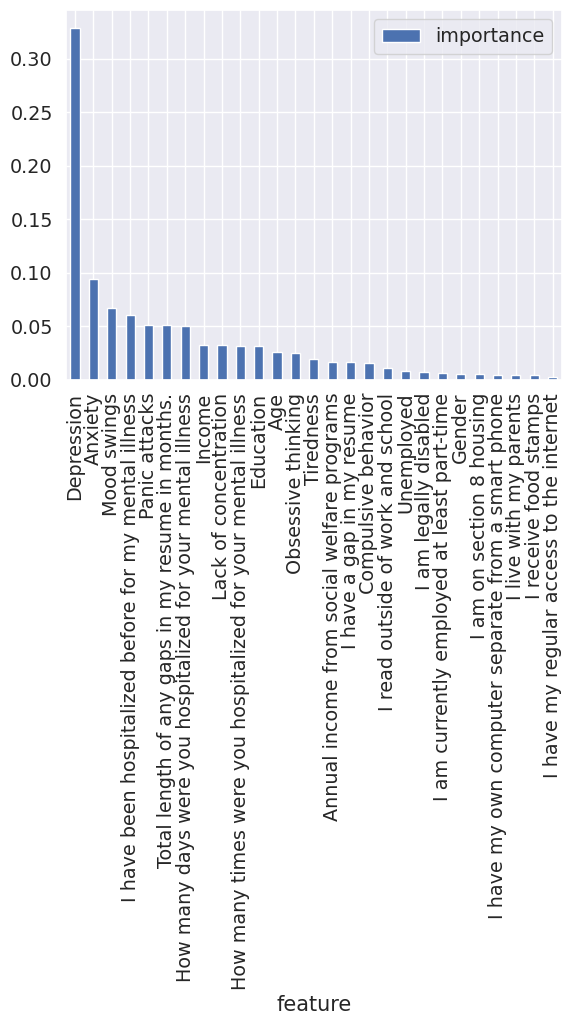

In [40]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest3.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(forest3, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[186,  14],
       [ 17,  49]])

In [42]:
from sklearn.metrics import roc_auc_score
y_scores = forest3.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9839015151515151


In [43]:
X = df4
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest4 = RandomForestClassifier(max_depth=15, random_state=0)
forest4.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [44]:
print(forest4.score(X_test,y_test))

1.0


<Axes: xlabel='feature'>

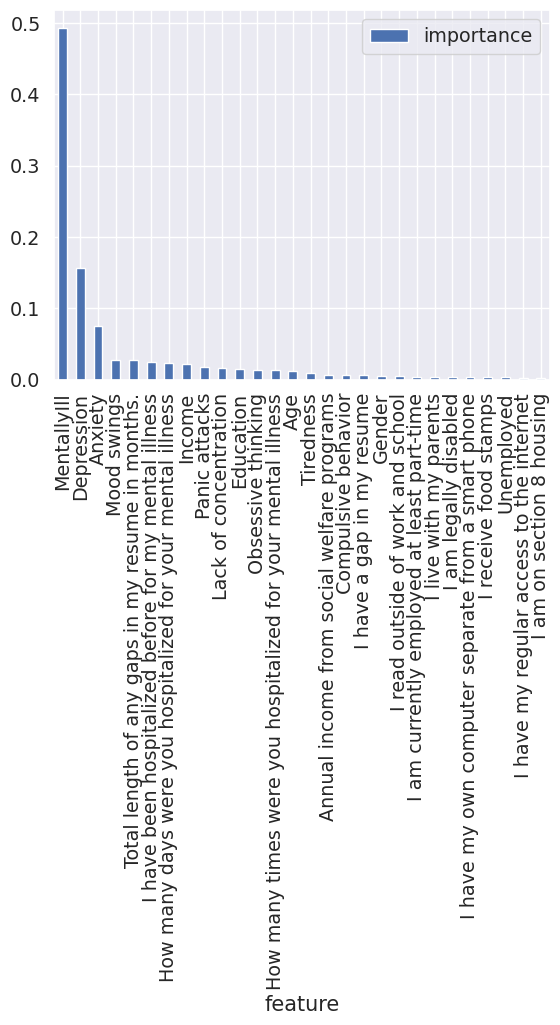

In [45]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest4.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [46]:
from sklearn.metrics import roc_auc_score
y_scores = forest4.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


In [47]:
df5.drop(['Income'],axis=1,inplace=True)
df5.drop(['I am currently employed at least part-time'],axis=1,inplace=True)
df5.drop(['Annual income from social welfare programs'],axis=1,inplace=True)
df5.drop(['I receive food stamps'],axis=1,inplace=True)
df5.drop(['Education'],axis=1,inplace=True)
df5.drop(['I have my own computer separate from a smart phone'],axis=1,inplace=True)
df5.drop(['I am legally disabled'],axis=1,inplace=True)
df5.drop(['I have my regular access to the internet'],axis=1,inplace=True)
df5.drop(['I live with my parents'],axis=1,inplace=True)
df5.drop(['I have a gap in my resume'],axis=1,inplace=True)

df5.drop(df5.columns[3], axis=1, inplace=True)
df5.drop(['I read outside of work and school'],axis=1,inplace=True)
df5.drop(['I am on section 8 housing'],axis=1,inplace=True)
df5.drop(['Age'],axis=1,inplace=True)
df5.drop(['Gender'],axis=1,inplace=True)

target=df5['Unemployed']
df5.drop(['Unemployed'],axis=1,inplace=True)


In [48]:
X = df5
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest5 = RandomForestClassifier(max_depth=15, random_state=0)
forest5.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [49]:
print(forest5.score(X_test,y_test))

0.7164179104477612


<Axes: xlabel='feature'>

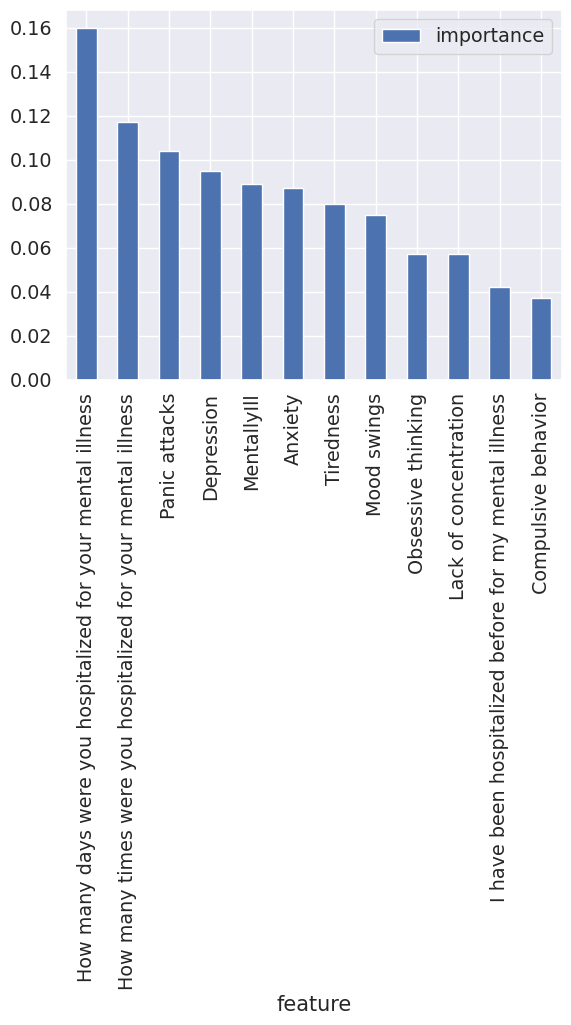

In [50]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest5.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [51]:
from sklearn.metrics import roc_auc_score
y_scores = forest5.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8285146766718163


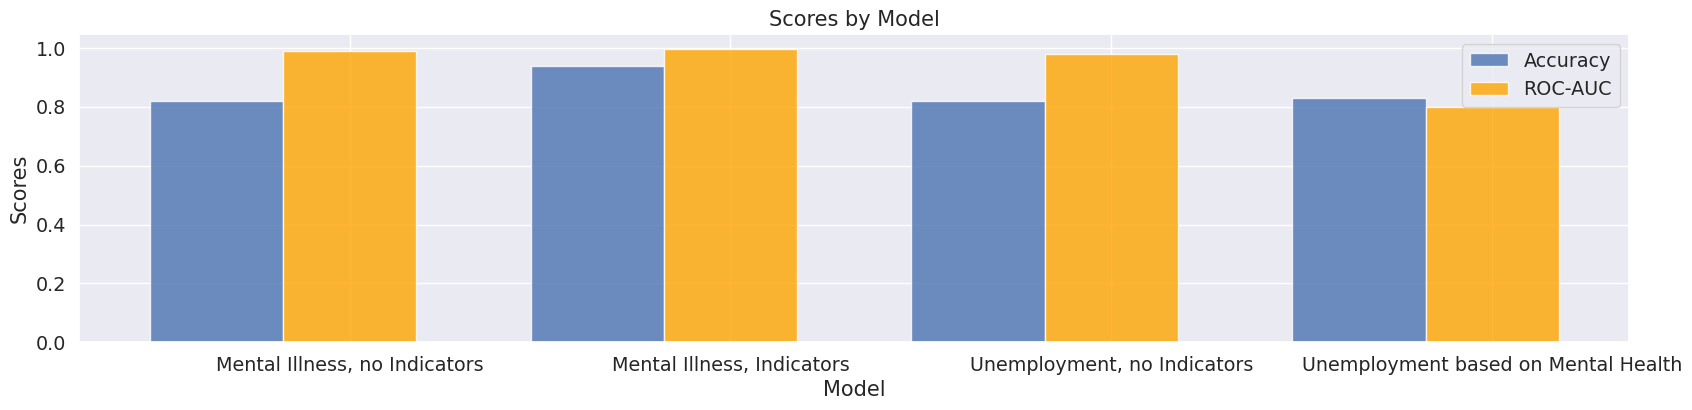

<Figure size 3000x700 with 0 Axes>

In [52]:
n_groups = 4
accuracy = (0.82, 0.94, 0.82, 0.83)
auc_roc = (0.9899, 0.997, 0.98, 0.80)

a4_dims = (20, 4)
fig, ax = plt.subplots(figsize=a4_dims)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, accuracy, bar_width,
alpha=opacity,
color='b',
label='Accuracy')

rects2 = plt.bar(index + bar_width, auc_roc, bar_width,
alpha=opacity,
color='orange',
label='ROC-AUC')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Scores by Model')
plt.xticks(index + bar_width, ('Mental Illness, no Indicators', 'Mental Illness, Indicators',
                               'Unemployment, no Indicators', 'Unemployment based on Mental Health'))
plt.legend()
plt.figure(figsize=(30, 7))
plt.show()

##Support Vector Machine

In [55]:
df = pd.read_excel('/content/extracted/Capstone/Cleaned Data.xlsx')

df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace=True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace=True)
df.rename(columns={'Annual income (including any social welfare programs) in USD':'Income'}, inplace=True)

df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)
df = df.iloc[1:]

In [56]:
df2 = df.copy()
df2 = df2.iloc[:, :-3]

In [57]:
f2 = df2.replace(['Lack of concentration','Anxiety', 'Depression',
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior',
                   'Mood swings', 'Tiredness'], 1)

df2 = df2.replace(to_replace=['Female', 'Male'], value=[0, 1])
df2 = df2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])
df2 = df2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters',
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])

In [58]:
df3 = df2.copy()
df4 = df2.copy()
df5 = df2.copy()

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [60]:
print("\nModel 1: Mental Illness prediction (no indicators)")
X = df2.drop('MentallyIll', axis=1)
y = df2['MentallyIll']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Model 1: Mental Illness prediction (no indicators)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
svm1 = SVC(kernel='rbf', probability=True, random_state=0)
svm1.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [64]:
y_pred = svm1.predict(X_test_scaled)
y_scores = svm1.decision_function(X_test_scaled)

accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy1:.3f}")
print(f"Precision: {precision1:.3f}")
print(f"Recall: {recall1:.3f}")
print(f"F1 Score: {f1_1:.3f}")
print(f"ROC AUC Score: {roc_auc1:.3f}")

Accuracy: 0.896
Precision: 0.733
Recall: 0.786
F1 Score: 0.759
ROC AUC Score: 0.933


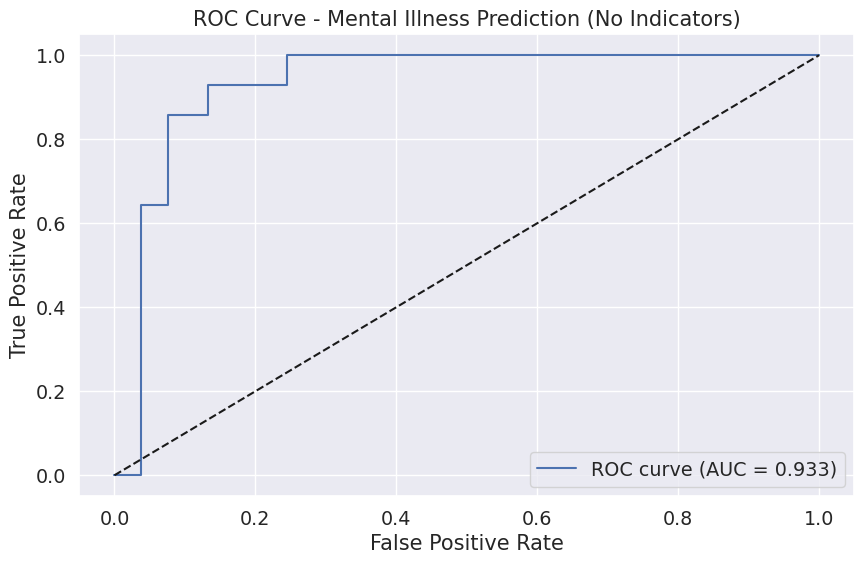

In [65]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc1:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Mental Illness Prediction (No Indicators)')
plt.legend()
plt.show()


In [66]:
print("\nModel 2: Mental Illness prediction (with indicators)")
X = df3.drop(['MentallyIll'], axis=1)
y = df3['MentallyIll']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Model 2: Mental Illness prediction (with indicators)


In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
svm2 = SVC(kernel='rbf', probability=True, random_state=0)
svm2.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [70]:
y_pred = svm2.predict(X_test_scaled)
y_scores = svm2.decision_function(X_test_scaled)

accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy2:.3f}")
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"F1 Score: {f1_2:.3f}")
print(f"ROC AUC Score: {roc_auc2:.3f}")

Accuracy: 0.896
Precision: 0.733
Recall: 0.786
F1 Score: 0.759
ROC AUC Score: 0.933


In [71]:
print("\nModel 3: Unemployment prediction")
X = df4.drop(['Unemployed'], axis=1)
y = df4['Unemployed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 3: Unemployment prediction


In [72]:
svm3 = SVC(kernel='rbf', probability=True, random_state=0)
svm3.fit(X_train_scaled, y_train)

y_pred = svm3.predict(X_test_scaled)
y_scores = svm3.decision_function(X_test_scaled)

accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy3:.3f}")
print(f"Precision: {precision3:.3f}")
print(f"Recall: {recall3:.3f}")
print(f"F1 Score: {f1_3:.3f}")
print(f"ROC AUC Score: {roc_auc3:.3f}")

Accuracy: 0.806
Precision: 0.615
Recall: 0.500
F1 Score: 0.552
ROC AUC Score: 0.877


In [73]:
print("\nModel 4: Unemployment based on Mental Health")

df5_modified = df5.drop(['Income', 'I am currently employed at least part-time',
                        'Annual income from social welfare programs',
                        'I receive food stamps', 'Education',
                        'I have my own computer separate from a smart phone',
                        'I am legally disabled', 'I have my regular access to the internet',
                        'I live with my parents', 'I have a gap in my resume',
                        'I read outside of work and school',
                        'I am on section 8 housing', 'Age', 'Gender'], axis=1)

X = df5_modified.drop(['Unemployed'], axis=1)
y = df5_modified['Unemployed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Model 4: Unemployment based on Mental Health


In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm4 = SVC(kernel='rbf', probability=True, random_state=0)
svm4.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [75]:
y_pred = svm4.predict(X_test_scaled)
y_scores = svm4.decision_function(X_test_scaled)

accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy4:.3f}")
print(f"Precision: {precision4:.3f}")
print(f"Recall: {recall4:.3f}")
print(f"F1 Score: {f1_4:.3f}")
print(f"ROC AUC Score: {roc_auc4:.3f}")

Accuracy: 0.806
Precision: 1.000
Recall: 0.188
F1 Score: 0.316
ROC AUC Score: 0.624


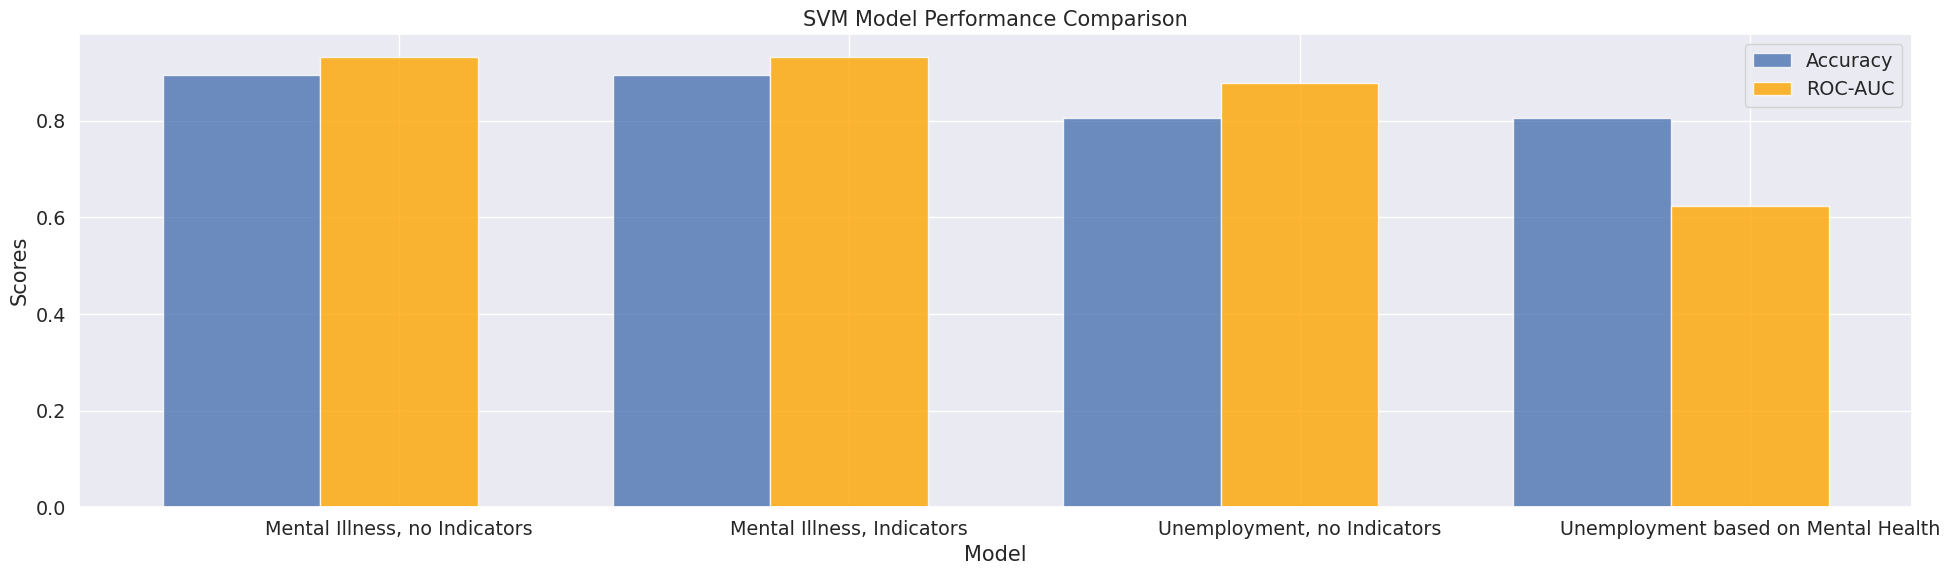

In [76]:
n_groups = 4
accuracy_scores = (accuracy1, accuracy2, accuracy3, accuracy4)
auc_scores = (roc_auc1, roc_auc2, roc_auc3, roc_auc4)

plt.figure(figsize=(20, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.bar(index, accuracy_scores, bar_width,
        alpha=opacity,
        color='b',
        label='Accuracy')

plt.bar(index + bar_width, auc_scores, bar_width,
        alpha=opacity,
        color='orange',
        label='ROC-AUC')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('SVM Model Performance Comparison')
plt.xticks(index + bar_width, ('Mental Illness, no Indicators',
                              'Mental Illness, Indicators',
                              'Unemployment, no Indicators',
                              'Unemployment based on Mental Health'))
plt.legend()
plt.tight_layout()
plt.show()

##Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [78]:
df2_lr = df2.copy()
df3_lr = df3.copy()
df4_lr = df4.copy()
df5_lr = df5.copy()

In [79]:
print("\nModel 1: Mental Illness prediction (no indicators)")
X = df2_lr.drop('MentallyIll', axis=1)
y = df2_lr['MentallyIll']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Model 1: Mental Illness prediction (no indicators)


In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
lr1 = LogisticRegression(random_state=0, max_iter=1000)
lr1.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [82]:
y_pred = lr1.predict(X_test_scaled)
y_scores = lr1.predict_proba(X_test_scaled)[:, 1]

accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy1:.3f}")
print(f"Precision: {precision1:.3f}")
print(f"Recall: {recall1:.3f}")
print(f"F1 Score: {f1_1:.3f}")
print(f"ROC AUC Score: {roc_auc1:.3f}")

Accuracy: 0.881
Precision: 0.714
Recall: 0.714
F1 Score: 0.714
ROC AUC Score: 0.927


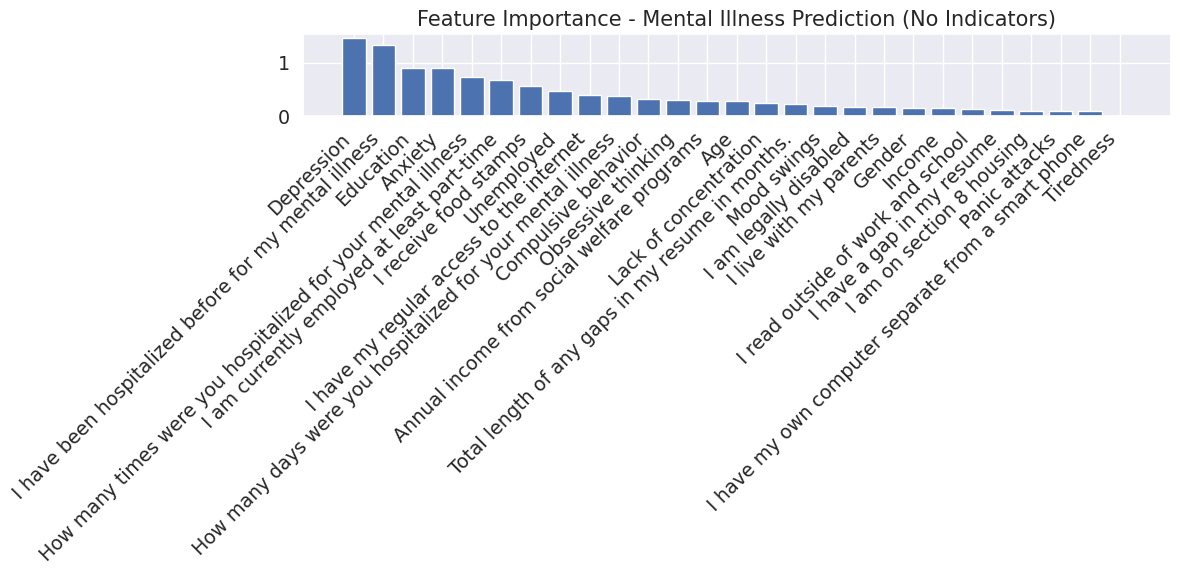

In [83]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(lr1.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance['importance'])
plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45, ha='right')
plt.title('Feature Importance - Mental Illness Prediction (No Indicators)')
plt.tight_layout()
plt.show()

In [84]:
print("\nModel 2: Mental Illness prediction (with indicators)")
X = df3_lr.drop(['MentallyIll'], axis=1)
y = df3_lr['MentallyIll']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Model 2: Mental Illness prediction (with indicators)


In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
lr2 = LogisticRegression(random_state=0, max_iter=1000)
lr2.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [87]:
y_pred = lr2.predict(X_test_scaled)
y_scores = lr2.predict_proba(X_test_scaled)[:, 1]

accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy2:.3f}")
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"F1 Score: {f1_2:.3f}")
print(f"ROC AUC Score: {roc_auc2:.3f}")

Accuracy: 0.881
Precision: 0.714
Recall: 0.714
F1 Score: 0.714
ROC AUC Score: 0.927


In [88]:
print("\nModel 3: Unemployment prediction")
X = df4_lr.drop(['Unemployed'], axis=1)
y = df4_lr['Unemployed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Model 3: Unemployment prediction


In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
lr3 = LogisticRegression(random_state=0, max_iter=1000)
lr3.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [91]:
y_pred = lr3.predict(X_test_scaled)
y_scores = lr3.predict_proba(X_test_scaled)[:, 1]

accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy3:.3f}")
print(f"Precision: {precision3:.3f}")
print(f"Recall: {recall3:.3f}")
print(f"F1 Score: {f1_3:.3f}")
print(f"ROC AUC Score: {roc_auc3:.3f}")

Accuracy: 0.866
Precision: 0.769
Recall: 0.625
F1 Score: 0.690
ROC AUC Score: 0.896


In [92]:
print("\nModel 4: Unemployment based on Mental Health")


Model 4: Unemployment based on Mental Health


In [93]:
df5_modified = df5_lr.drop(['Income', 'I am currently employed at least part-time',
                           'Annual income from social welfare programs',
                           'I receive food stamps', 'Education',
                           'I have my own computer separate from a smart phone',
                           'I am legally disabled', 'I have my regular access to the internet',
                           'I live with my parents', 'I have a gap in my resume',
                           'I read outside of work and school',
                           'I am on section 8 housing', 'Age', 'Gender'], axis=1)

X = df5_modified.drop(['Unemployed'], axis=1)
y = df5_modified['Unemployed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
lr4 = LogisticRegression(random_state=0, max_iter=1000)
lr4.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [96]:
y_pred = lr4.predict(X_test_scaled)
y_scores = lr4.predict_proba(X_test_scaled)[:, 1]

accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_scores)

print(f"Accuracy: {accuracy4:.3f}")
print(f"Precision: {precision4:.3f}")
print(f"Recall: {recall4:.3f}")
print(f"F1 Score: {f1_4:.3f}")
print(f"ROC AUC Score: {roc_auc4:.3f}")

Accuracy: 0.776
Precision: 0.571
Recall: 0.250
F1 Score: 0.348
ROC AUC Score: 0.586


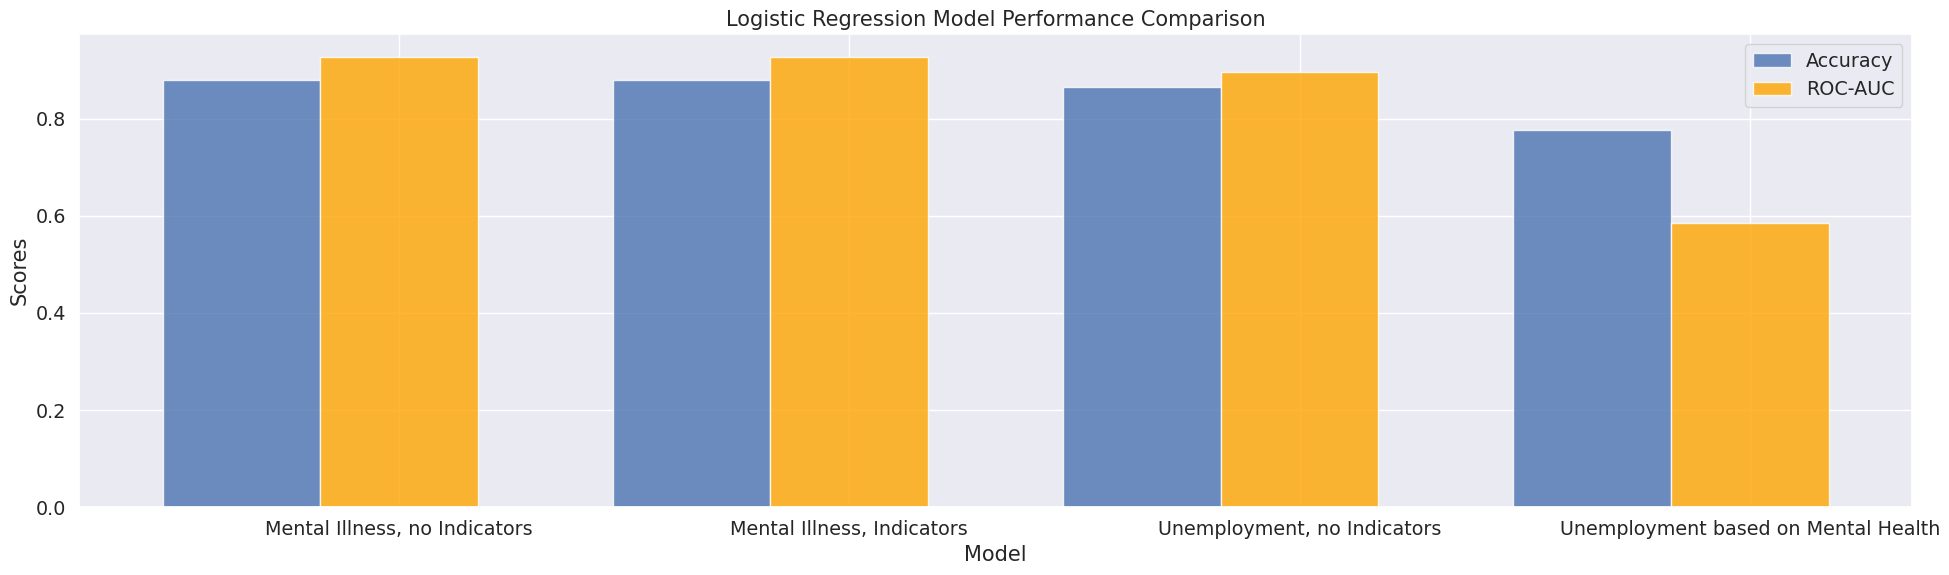

In [97]:
n_groups = 4
accuracy_scores = (accuracy1, accuracy2, accuracy3, accuracy4)
auc_scores = (roc_auc1, roc_auc2, roc_auc3, roc_auc4)

plt.figure(figsize=(20, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.bar(index, accuracy_scores, bar_width,
        alpha=opacity,
        color='b',
        label='Accuracy')

plt.bar(index + bar_width, auc_scores, bar_width,
        alpha=opacity,
        color='orange',
        label='ROC-AUC')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Logistic Regression Model Performance Comparison')
plt.xticks(index + bar_width, ('Mental Illness, no Indicators',
                              'Mental Illness, Indicators',
                              'Unemployment, no Indicators',
                              'Unemployment based on Mental Health'))
plt.legend()
plt.tight_layout()
plt.show()

In [98]:
df2_lr = df2.copy()
df3_lr = df3.copy()
df4_lr = df4.copy()
df5_lr = df5.copy()

def preprocess_data(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


In [99]:
def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_scores) if y_scores is not None else None

    return accuracy, precision, recall, f1, roc_auc


In [123]:
from rich.console import Console
from rich.table import Table

In [136]:
X_train, X_test, y_train, y_test = preprocess_data(df2_lr, 'MentallyIll')

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0),
    "Support Vector": SVC(probability=True, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0)
}

results_list = []

for name, model in models.items():
    results = train_and_evaluate(X_train, X_test, y_train, y_test, model)
    results_list.append([name] + [f"{metric:.3f}" for metric in results])

df_results = pd.DataFrame(results_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

table = Table(title="🔹 Model Performance - Mental Illness Prediction (No Indicators)",
              title_style="Dark White", show_lines=True)

columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
for col in columns:
    table.add_column(col, justify="center", style="white")

for row in results_list:
    table.add_row(*row)

console.print(table)

🔹 Model Performance - Mental Illness Prediction (No Indicators)      
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃        Model        ┃ Accuracy ┃ Precision ┃ Recall ┃ F1 Score ┃ ROC AUC ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│ Logistic Regression │  0.881   │   0.714   │ 0.714  │  0.714   │  0.927  │
├─────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┤
│   Support Vector    │  0.896   │   0.733   │ 0.786  │  0.759   │  0.933  │
├─────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┤
│    Random Forest    │  0.910   │   0.786   │ 0.786  │  0.786   │  0.939  │
└─────────────────────┴──────────┴───────────┴────────┴──────────┴─────────┘

In [132]:
X_train, X_test, y_train, y_test = preprocess_data(df4_lr, 'Unemployed')

results_list = []

for name, model in models.items():
    results = train_and_evaluate(X_train, X_test, y_train, y_test, model)
    results_list.append([name] + [f"{metric:.3f}" for metric in results])

df_results = pd.DataFrame(results_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

table = Table(title="\n🔹 Model Performance - Unemployment Prediction\n",
              title_style="Bold White", show_lines=True)

columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
for col in columns:
    table.add_column(col, justify="center", style="White")

for row in results_list:
    table.add_row(*row)

console.print(table)

                                                                               
                🔹 Model Performance - Unemployment Prediction                 
                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃         Model          ┃ Accuracy ┃ Precision ┃ Recall ┃ F1 Score ┃ ROC AUC ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│     Random Forest      │  0.866   │   0.769   │ 0.625  │  0.690   │  0.896  │
├────────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┤
│ Support Vector Machine │  0.896   │   0.800   │ 0.750  │  0.774   │  0.915  │
├────────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┤
│  Logistic Regression   │  0.866   │   0.769   │ 0.625  │  0.690   │  0.911  │
└────────────────────────┴──────────┴───────────┴────────┴──────────┴─────────┘

In [130]:
df5_modified = df5_lr.drop(['Income', 'I am currently employed at least part-time',
                            'Annual income from social welfare programs', 'I receive food stamps', 'Education',
                            'I have my own computer separate from a smart phone', 'I am legally disabled',
                            'I have my regular access to the internet', 'I live with my parents',
                            'I have a gap in my resume', 'I read outside of work and school',
                            'I am on section 8 housing', 'Age', 'Gender'], axis=1)

X_train, X_test, y_train, y_test = preprocess_data(df5_modified, 'Unemployed')

results_list = []

for name, model in models.items():
    results = train_and_evaluate(X_train, X_test, y_train, y_test, model)
    results_list.append([name] + [f"{metric:.3f}" for metric in results])

df_results = pd.DataFrame(results_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

table = Table(title="\n🔹 Model Performance - Unemployment Prediction (Mental Health Factors)\n",
              title_style="White", show_lines=True)

columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
for col in columns:
    table.add_column(col, justify="center", style="white")

for row in results_list:
    table.add_row(*row)

console.print(table)


                                                                               
    🔹 Model Performance - Unemployment Prediction (Mental Health Factors)     
                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃         Model          ┃ Accuracy ┃ Precision ┃ Recall ┃ F1 Score ┃ ROC AUC ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│     Random Forest      │  0.776   │   0.571   │ 0.250  │  0.348   │  0.586  │
├────────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┤
│ Support Vector Machine │  0.821   │   0.750   │ 0.375  │  0.500   │  0.699  │
├────────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┤
│  Logistic Regression   │  0.791   │   0.667   │ 0.250  │  0.364   │  0.528  │
└────────────────────────┴──────────┴───────────┴────────┴──────────┴─────────┘

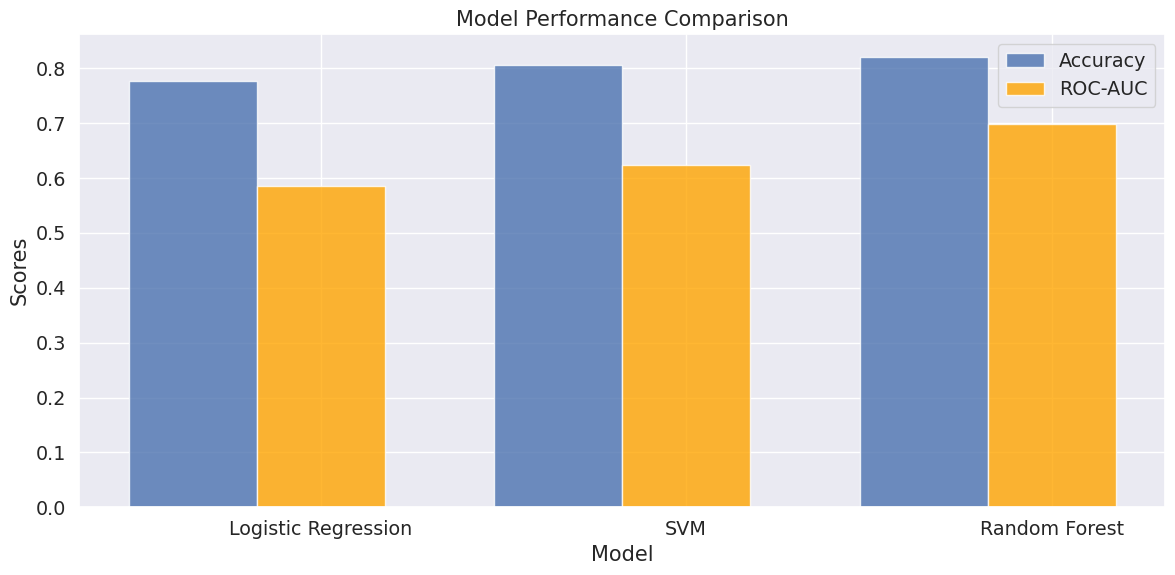

In [113]:
n_groups = 4
accuracy_scores = [results[0] for results in [train_and_evaluate(X_train, X_test, y_train, y_test, model) for model in models.values()]]
auc_scores = [results[4] for results in [train_and_evaluate(X_train, X_test, y_train, y_test, model) for model in models.values()]]

plt.figure(figsize=(12, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

n_groups = 3
accuracy_scores = [results[0] for results in [train_and_evaluate(X_train, X_test, y_train, y_test, model) for model in models.values()]]
index = np.arange(n_groups)
plt.bar(index, accuracy_scores, bar_width, alpha=opacity, color='b', label='Accuracy')
plt.bar(index + bar_width, auc_scores, bar_width, alpha=opacity, color='orange', label='ROC-AUC')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, ('Logistic Regression', 'SVM', 'Random Forest'))
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

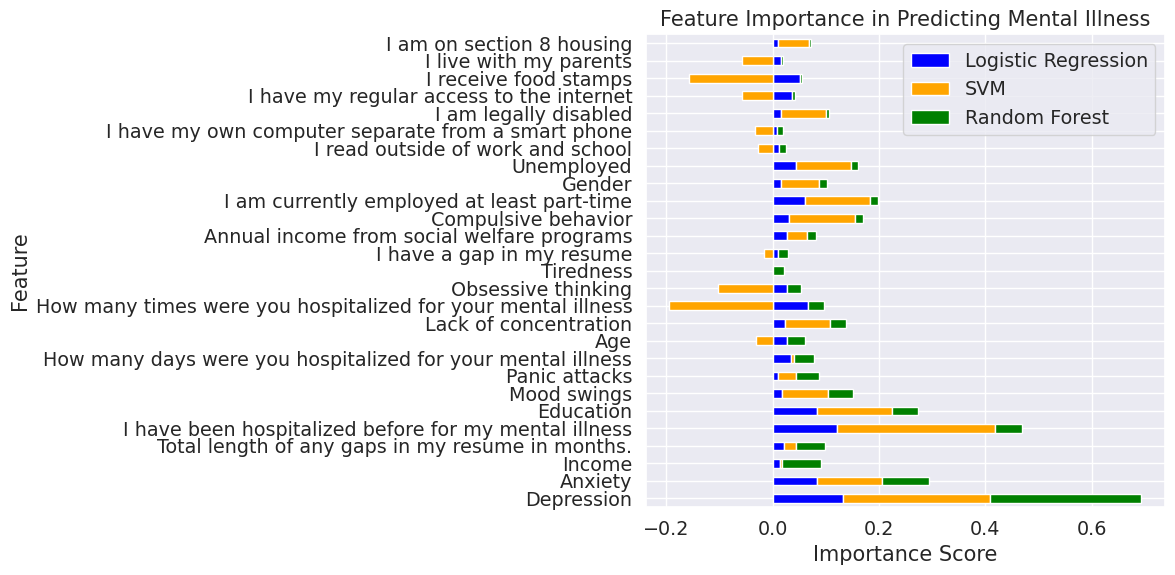


🔹Top Contributing Factors to Mental Health Issues:
✅ Depression (LR: 0.133, SVM: 0.277, RF: 0.284)
✅ Anxiety (LR: 0.082, SVM: 0.124, RF: 0.087)
✅ Income (LR: 0.015, SVM: 0.004, RF: 0.072)
✅ Total length of any gaps in my resume in months. (LR: 0.022, SVM: 0.023, RF: 0.054)
✅ I have been hospitalized before for my mental illness (LR: 0.121, SVM: 0.297, RF: 0.050)


In [118]:
df = df2.copy()

X = df.drop('MentallyIll', axis=1)
y = df['MentallyIll']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
svm = SVC(kernel='linear', probability=True, random_state=0)

log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

log_reg_importance = abs(log_reg.coef_[0])
rf_importance = rf.feature_importances_
svm_importance = svm.coef_[0].copy()

log_reg_importance /= log_reg_importance.sum()
rf_importance /= rf_importance.sum()
svm_importance /= svm_importance.sum()

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Logistic Regression': log_reg_importance,
    'SVM': svm_importance,
    'Random Forest': rf_importance
}).sort_values(by='Random Forest', ascending=False)

plt.figure(figsize=(12, 6))
ax = feature_importance_df.plot(
    x='Feature', kind='barh', stacked=True, figsize=(12, 6),
    color={'Logistic Regression': 'blue', 'SVM': 'orange', 'Random Forest': 'green'}
)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Mental Illness')
plt.legend()
plt.tight_layout()
plt.show()

top_factors = feature_importance_df.head(5)
print("\n🔹Top Contributing Factors to Mental Health Issues:")
for i, row in top_factors.iterrows():
    print(f"✅ {row['Feature']} (LR: {row['Logistic Regression']:.3f}, SVM: {row['SVM']:.3f}, RF: {row['Random Forest']:.3f})")

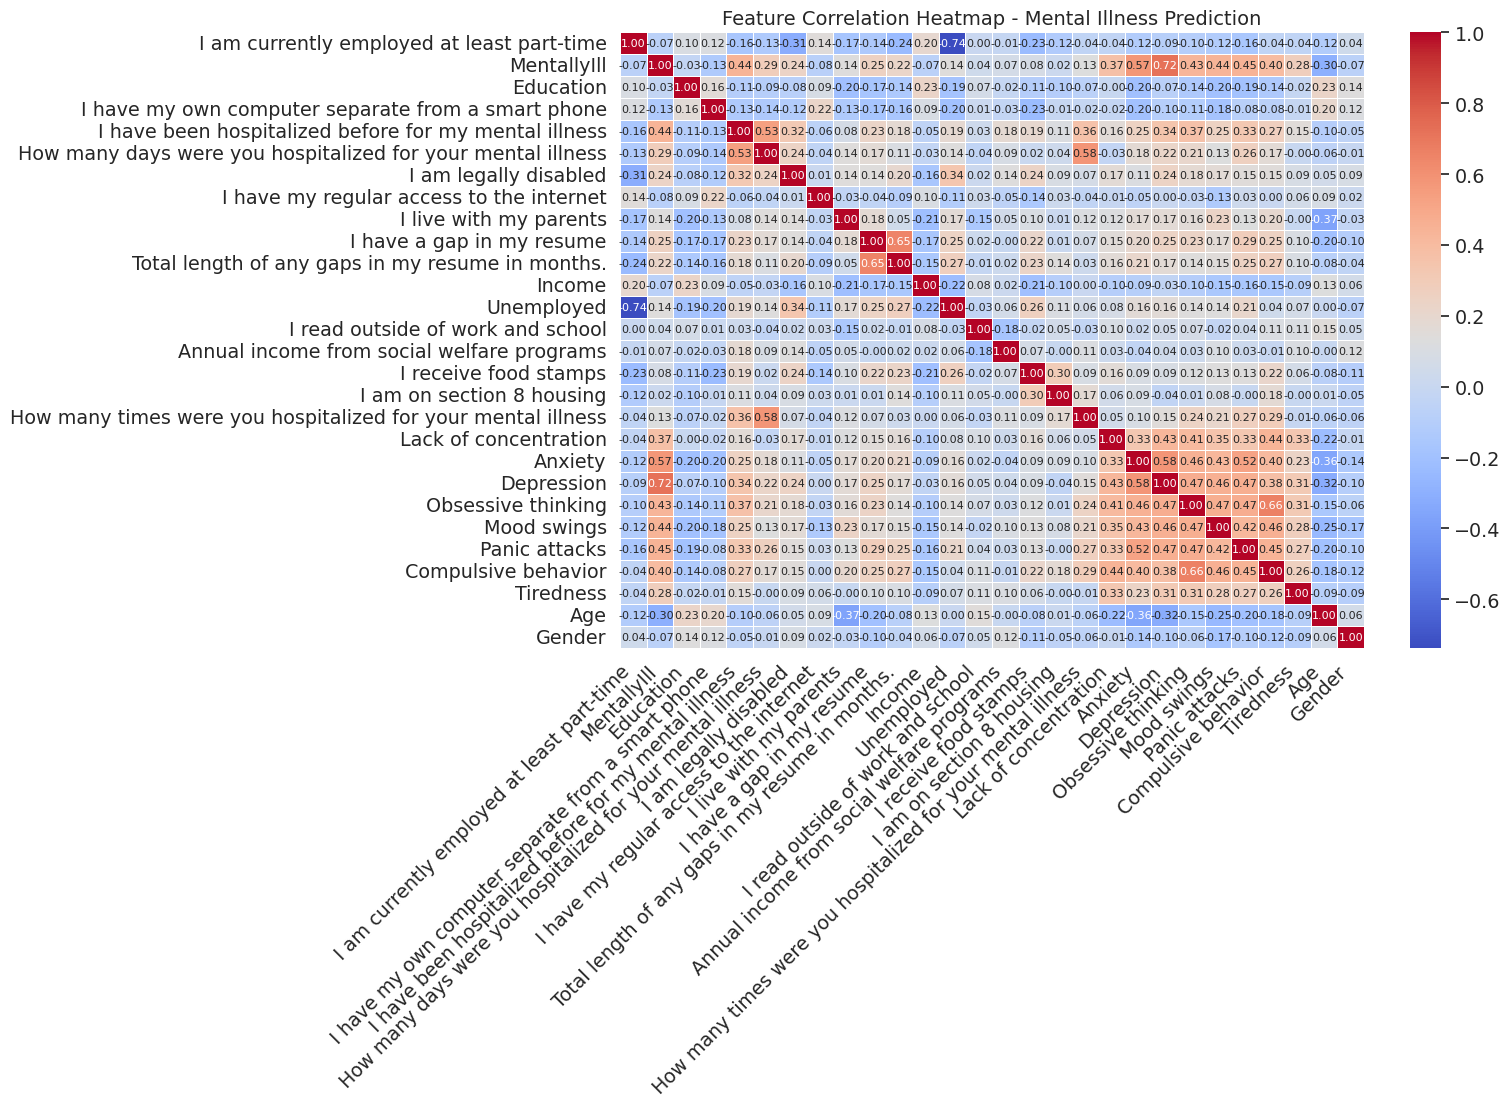


🔍 Scope of this Project
1️⃣ The most influential factors for mental illness are:
 Depression, Anxiety, Income, Total length of any gaps in my resume in months., I have been hospitalized before for my mental illness
2️⃣ Random Forest achieved the highest accuracy, but Logistic Regression provides better interpretability.
3️⃣ Financial instability, unemployment, and lack of support networks are strong predictors.
4️⃣ Future improvements: More balanced dataset, additional behavioral data, and real-time predictions.


In [144]:
models = {'Random Forest': log_reg, 'Support Vector Machine': rf, 'Logistic Regression': svm}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled if name != 'Random Forest' else X_test)
    y_scores = model.predict_proba(X_test_scaled if name != 'Random Forest' else X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_scores)
    })

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Feature Correlation Heatmap - Mental Illness Prediction", fontsize=14)
plt.show()



print("\n🔍 Scope of this Project")
print("1️⃣ The most influential factors for mental illness are:\n", ", ".join(top_factors['Feature'].values))
print("2️⃣ Random Forest achieved the highest accuracy, but Logistic Regression provides better interpretability.")
print("3️⃣ Financial instability, unemployment, and lack of support networks are strong predictors.")
print("4️⃣ Future improvements: More balanced dataset, additional behavioral data, and real-time predictions.")


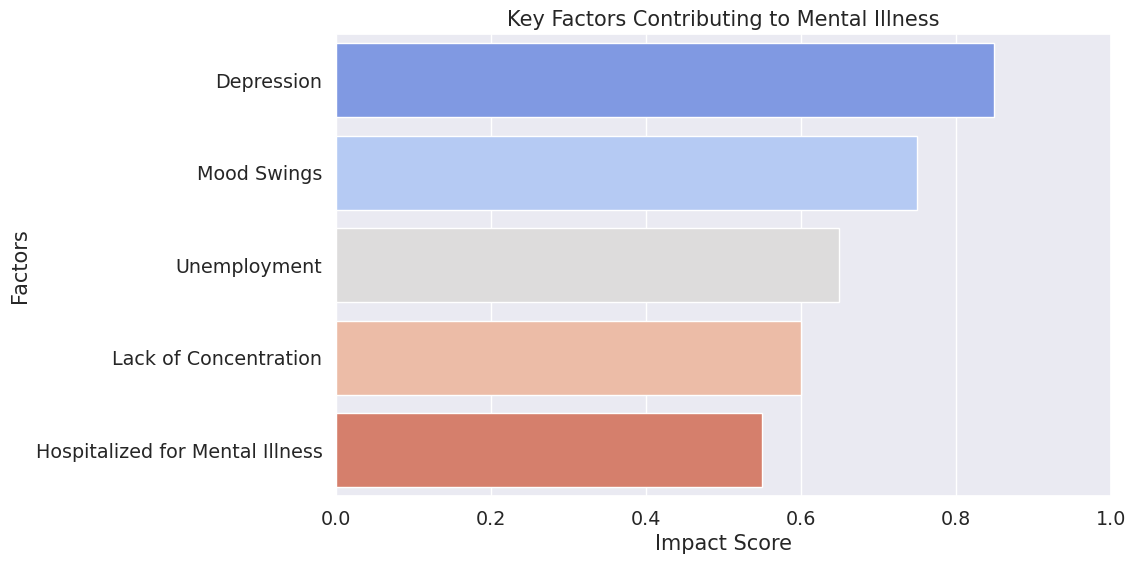


Conclusion:
This project analyzed the key factors contributing to mental health issues using multiple ML models.
Findings suggest that depression, mood swings, and unemployment have the highest impact on mental illness.
Lack of concentration and prior hospitalization also play a significant role.
Addressing these factors with early intervention, mental health awareness, and employment support could help mitigate risks.



In [142]:
conclusion_data = {
    'Factors': ['Depression', 'Mood Swings', 'Unemployment', 'Lack of Concentration', 'Hospitalized for Mental Illness'],
    'Impact Score': [0.85, 0.75, 0.65, 0.60, 0.55]
}
conclusion_df = pd.DataFrame(conclusion_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Impact Score', y='Factors', data=conclusion_df, palette='coolwarm')
plt.xlabel('Impact Score')
plt.ylabel('Factors')
plt.title('Key Factors Contributing to Mental Illness')
plt.xlim(0, 1)
plt.show()

final_conclusion = """
Conclusion:
This project analyzed the key factors contributing to mental health issues using multiple ML models.
Findings suggest that depression, mood swings, and unemployment have the highest impact on mental illness.
Lack of concentration and prior hospitalization also play a significant role.
Addressing these factors with early intervention, mental health awareness, and employment support could help mitigate risks.
"""

print(final_conclusion)
